<a href="https://colab.research.google.com/github/Sabrinawsf/telecom-x-churn-analysis/blob/main/telecom_x_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Extração (E - Extract)

In [198]:
# Importa bibliotecas
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [199]:
# Lê o arquivo
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

In [200]:
#Converte o arquivo json para um dataframe
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [201]:
# Lista de prefixos que você deseja remover
prefixos = ['customer.', 'phone.', 'internet.', 'account.']

# O regex r'|'.join(prefixos) cria o padrão: 'customer\.|phone\.|internet\.|account\.'
# O '\' escapa o ponto para garantir que o pandas entenda como um ponto literal
df.columns = df.columns.str.replace(r'|'.join(prefixos), '', regex=True)

df.head()


,D,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# 🔧 Transformação




In [202]:
#Conhecendo o Dataset
df.columns

Index(['D', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [203]:
#Conhecendo o Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   D         7267 non-null   object
 1   Churn     7267 non-null   object
 2   customer  7267 non-null   object
 3   phone     7267 non-null   object
 4   internet  7267 non-null   object
 5   account   7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [204]:
# Normaliza o dataframe:
# Converte para dicionário com parâmetro records para facilitar o normalize
## orient = 'records' : list like [{column -> value}, … , {column -> value}]
dicionario = df.to_dict('records')

# Normaliza separando com '_'
df = pd.json_normalize(dicionario, sep='_')
df.head()

,D,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [205]:
# Verifica em cada coluna os valores únicos
print(df.apply(pd.Series.unique))

D                            [0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF...
Churn                                                              [No, Yes, ]
customer_gender                                                 [Female, Male]
customer_SeniorCitizen                                                  [0, 1]
customer_Partner                                                     [Yes, No]
customer_Dependents                                                  [Yes, No]
customer_tenure              [9, 4, 13, 3, 71, 63, 7, 65, 54, 72, 5, 56, 34...
phone_PhoneService                                                   [Yes, No]
phone_MultipleLines                                [No, Yes, No phone service]
internet_InternetService                                [DSL, Fiber optic, No]
internet_OnlineSecurity                         [No, Yes, No internet service]
internet_OnlineBackup                           [Yes, No, No internet service]
internet_DeviceProtection                       [No,

In [206]:
# Verifica missing data (NaN, None, pd.NA)
df.isna().sum()

,0
D,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [207]:
df[(df['customer_tenure'] == 0)][
    ['customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total']
]

,customer_tenure,account_Charges_Monthly,account_Charges_Total
975,0,56.05,
1775,0,20.00,
1955,0,61.90,
2075,0,19.70,
2232,0,20.25,
2308,0,25.35,
2930,0,73.35,
3134,0,25.75,
3203,0,52.55,
4169,0,80.85,


In [208]:
# Colunas com valores vazios
df['account_Charges_Total'] = df['account_Charges_Total'] \
    .apply(lambda x: x.replace(' ', '0').strip())

df['Churn'] = df['Churn'] \
    .replace('', 'No') \
    .str.strip()

# Coluna account_Charges_Monthly
# Valores com 2 casas após o ponto
df['account_Charges_Monthly'] = df['account_Charges_Monthly'].round(2)

# Coluna account_Charges_Total
# Converte para float64 e para 2 casas após ponto
df['account_Charges_Total'] = df['account_Charges_Total'] \
    .astype(np.float64) \
    .round(2)

# Coluna nova: Contas_Diarias
df['Contas_Diarias'] = (df['account_Charges_Monthly'] / 30).round(2)

# Padroniza Yes e No para 1 e 0
df = df.apply(lambda x: x.replace('Yes', 1).replace('No', 0))

/tmp/ipython-input-4098510383.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.apply(lambda x: x.replace('Yes', 1).replace('No', 0))


In [209]:
#Comparação contas
df[['account_Charges_Monthly', 'Contas_Diarias']].head()

,account_Charges_Monthly,Contas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


# 📊 Carga e Análise

In [210]:
#Descritiva dos Dados
df.describe()

,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,account_PaperlessBilling,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2277.182035,2.157292
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2268.648587,1.004407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,396.200000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1389.200000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3778.525000,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


In [211]:
# Média
df.mean(numeric_only=True)

# Mediana
df.median(numeric_only=True)

# Desvio padrão
df.std(numeric_only=True)

# Variância
df.var(numeric_only=True)

# Valores mínimos
df.min(numeric_only=True)

# Valores máximos
df.max(numeric_only=True)

,0
Churn,1.00
customer_SeniorCitizen,1.00
customer_Partner,1.00
customer_Dependents,1.00
customer_tenure,72.00
phone_PhoneService,1.00
account_PaperlessBilling,1.00
account_Charges_Monthly,118.75
account_Charges_Total,8684.80
Contas_Diarias,3.96


In [212]:
# Estatísticas agrupadas por evasão
df.groupby('Churn').mean(numeric_only=True)

,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,account_PaperlessBilling,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
Churn,,,,,,,,,
0,0.130789,0.527788,0.343646,37.321045,0.900519,0.539274,61.354224,2535.263977,2.045056
1,0.254682,0.357945,0.174425,17.979133,0.909042,0.749064,74.441332,1531.796094,2.481450


In [213]:
# Conta clientes por churn
churn_counts = df['Churn'].value_counts()

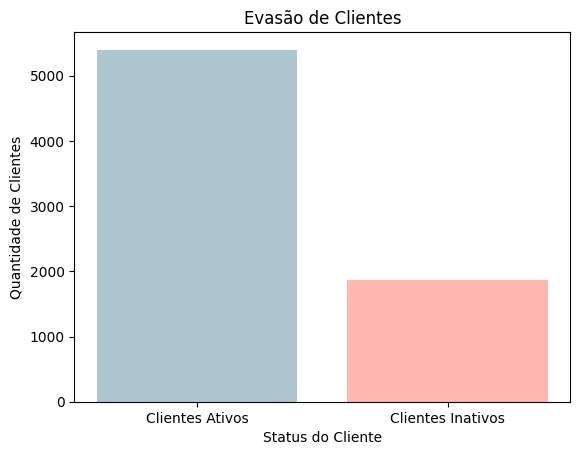

In [214]:
cores_pasteis = ['#AEC6CF', '#FFB7B2']  # azul pastel e rosa pastel

# Rótulos personalizados
labels = ['Clientes Ativos', 'Clientes Inativos']

# Criação do gráfico
plt.figure()
plt.bar(labels, churn_counts.values, color=cores_pasteis)

# Títulos e rótulos
plt.title('Evasão de Clientes')
plt.xlabel('Status do Cliente')
plt.ylabel('Quantidade de Clientes')

plt.show()

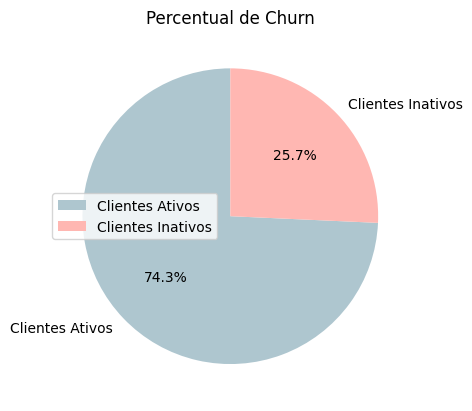

In [215]:
# Rótulos personalizados
labels = ['Clientes Ativos', 'Clientes Inativos']

# Cria gráfico de pizza
plt.figure()
plt.pie(
    churn_percent.values,
    labels=labels,
    colors=cores_pasteis,
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Percentual de Churn')
plt.legend(labels, loc='best')
plt.show()

In [216]:
pd.crosstab(df['customer_gender'], df['Churn'], normalize='index') * 100

Churn,0,1
customer_gender,,
Female,73.858575,26.141425
Male,74.693878,25.306122


In [217]:
# Cria lista de colunas removendo as indesejadas
colunas = [col for col in df.columns if col not in
           ['customer_tenure', 'account_Charges_Monthly',
            'account_Charges_Total', 'Contas_Diarias']]

colunas

['D',
 'Churn',
 'customer_gender',
 'customer_SeniorCitizen',
 'customer_Partner',
 'customer_Dependents',
 'phone_PhoneService',
 'phone_MultipleLines',
 'internet_InternetService',
 'internet_OnlineSecurity',
 'internet_OnlineBackup',
 'internet_DeviceProtection',
 'internet_TechSupport',
 'internet_StreamingTV',
 'internet_StreamingMovies',
 'account_Contract',
 'account_PaperlessBilling',
 'account_PaymentMethod']

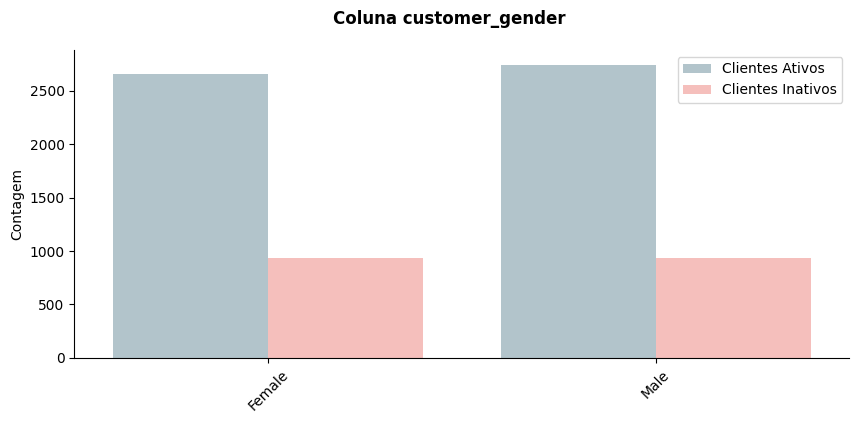

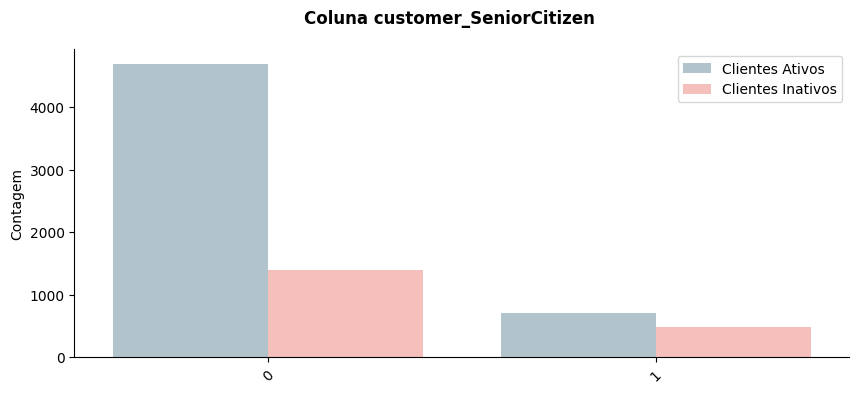

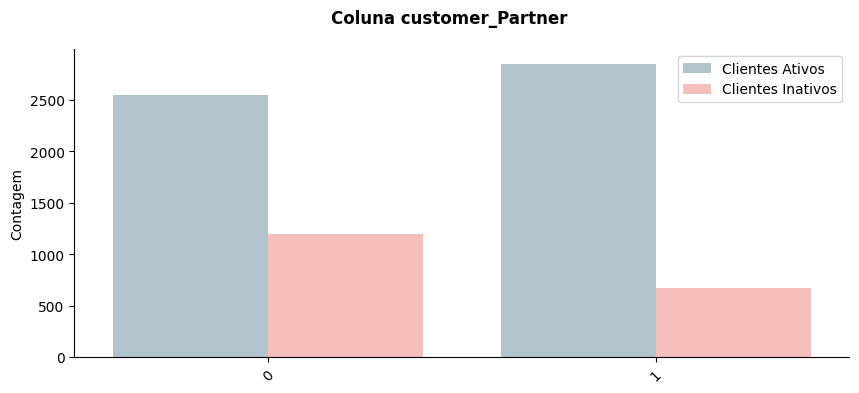

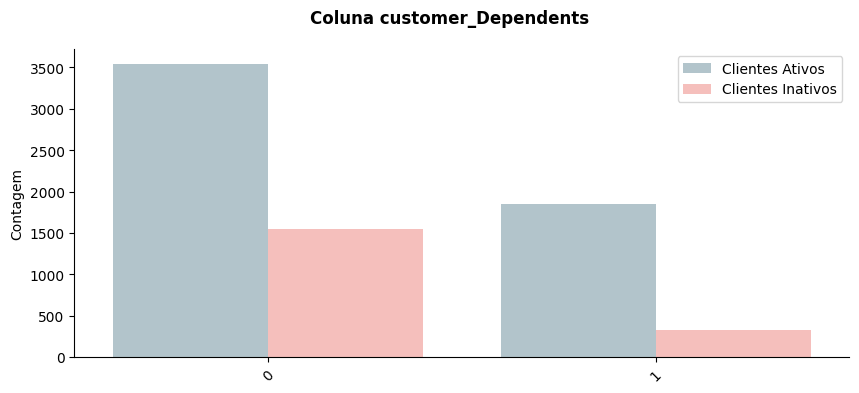

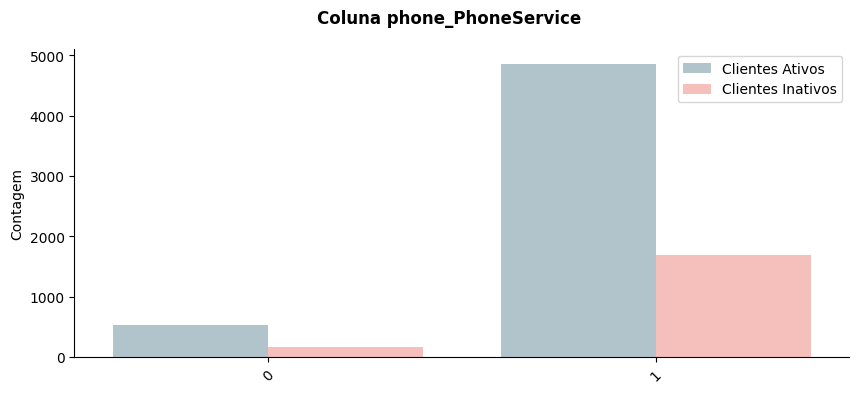

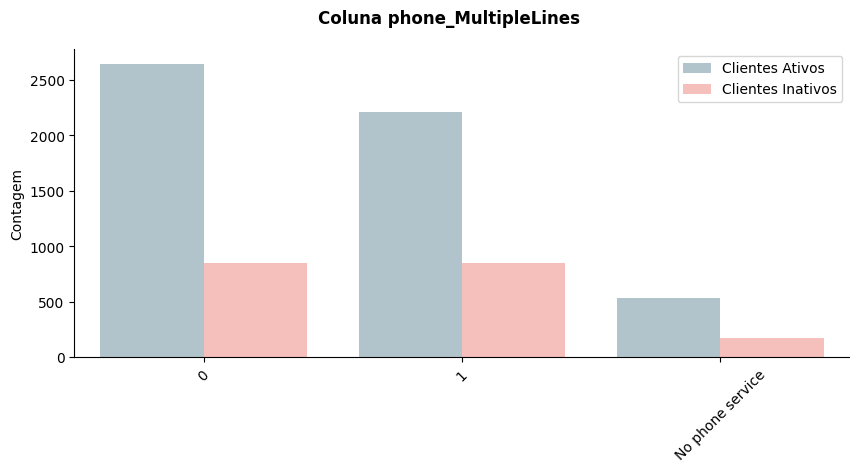

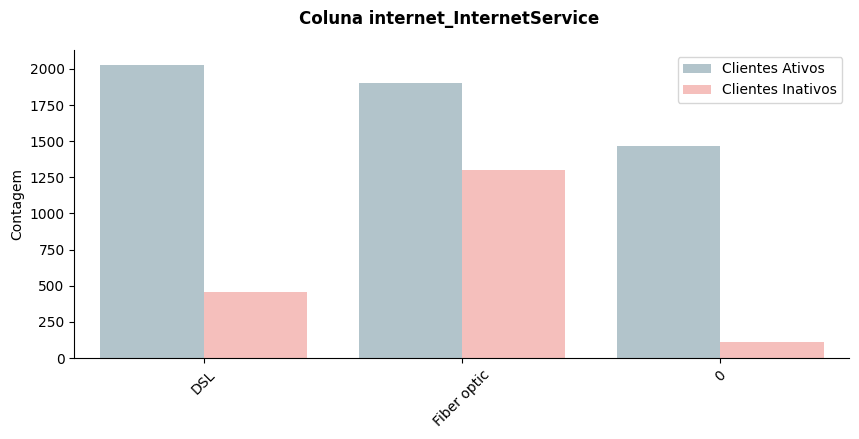

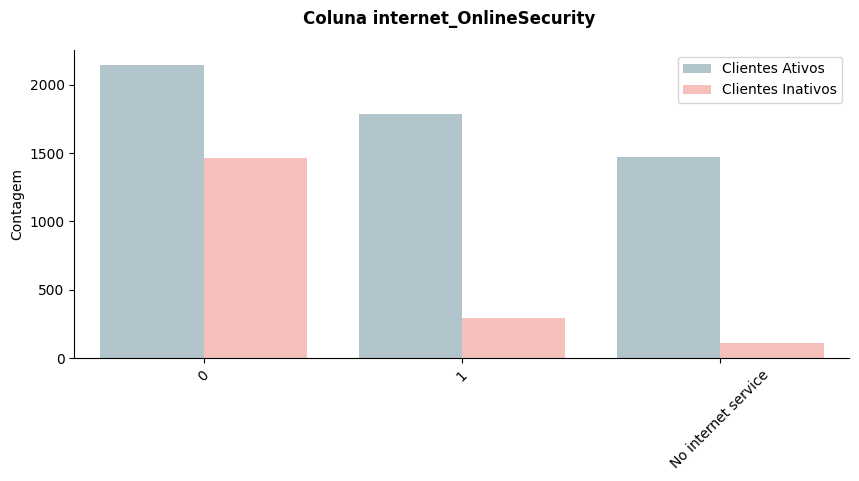

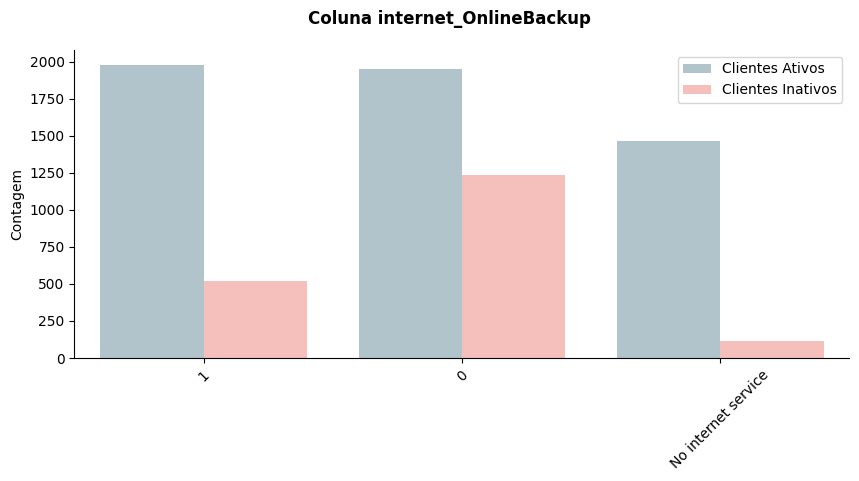

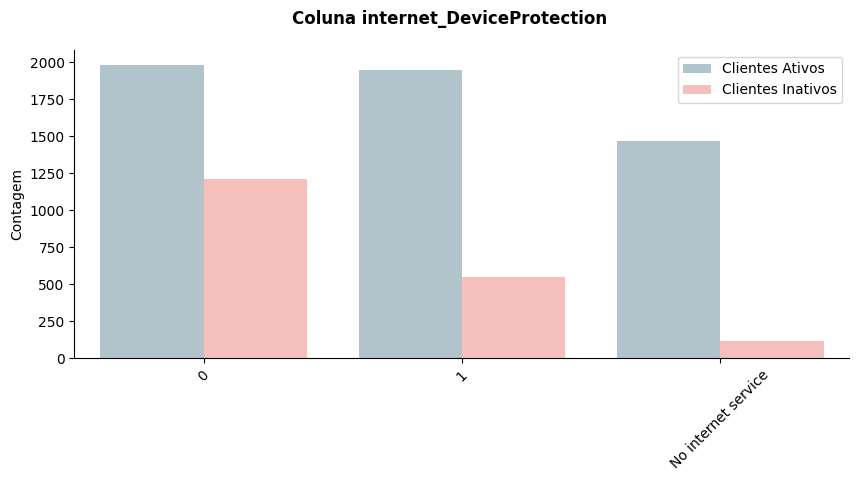

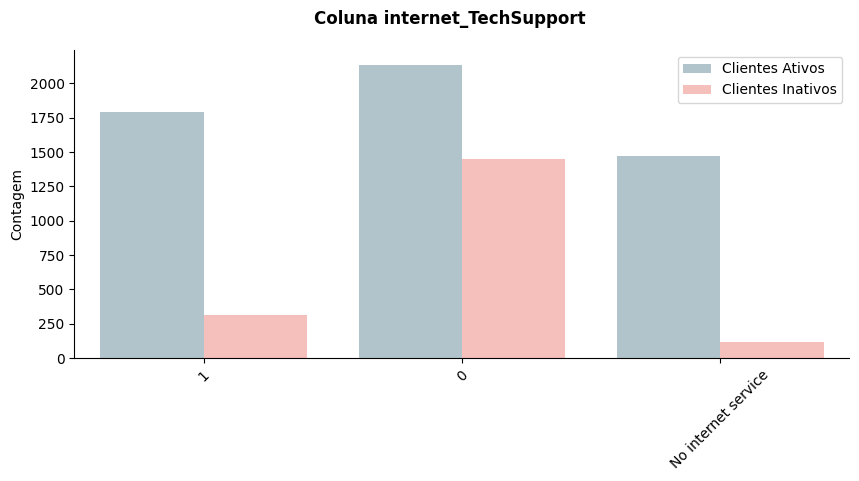

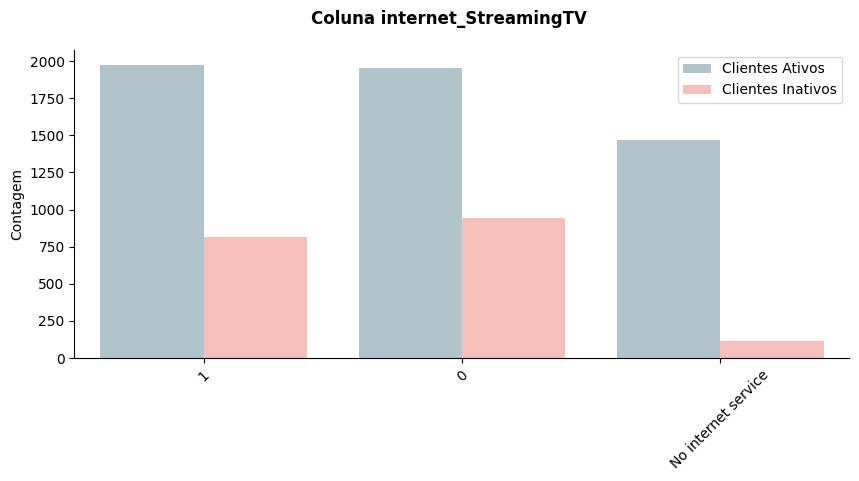

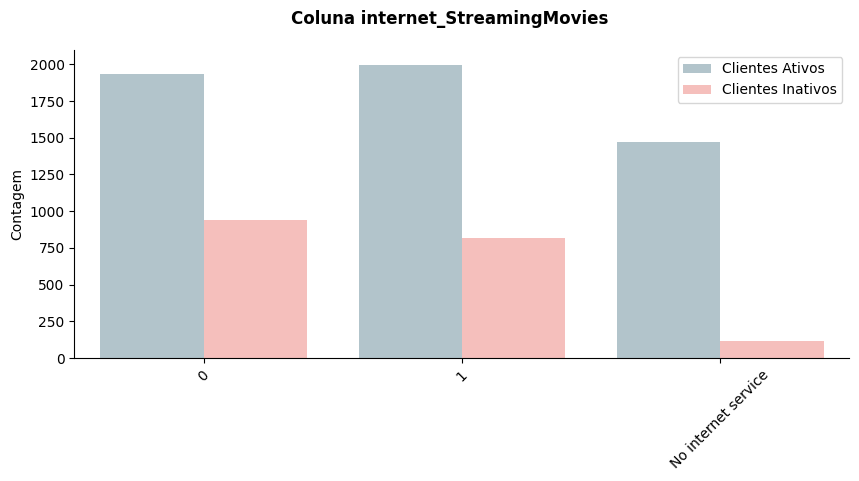

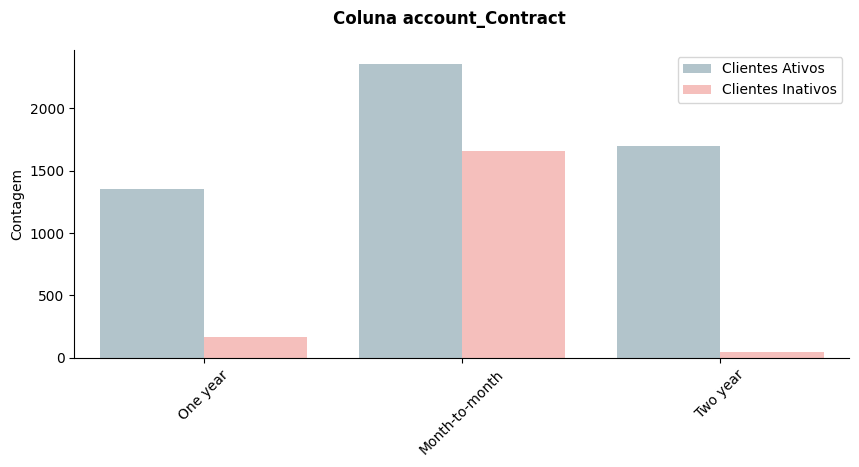

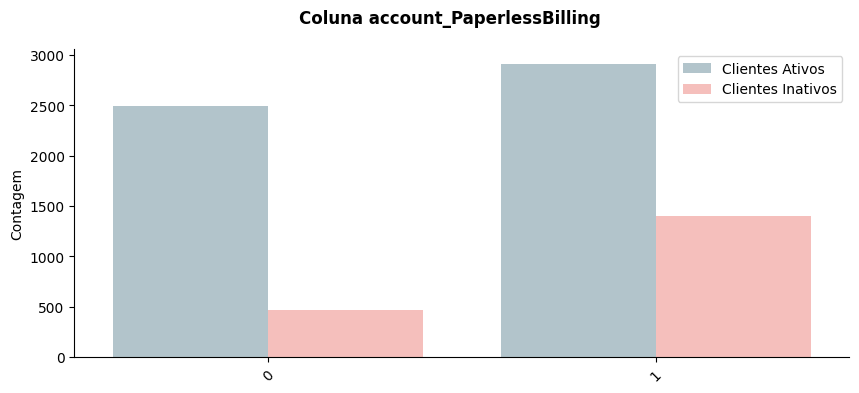

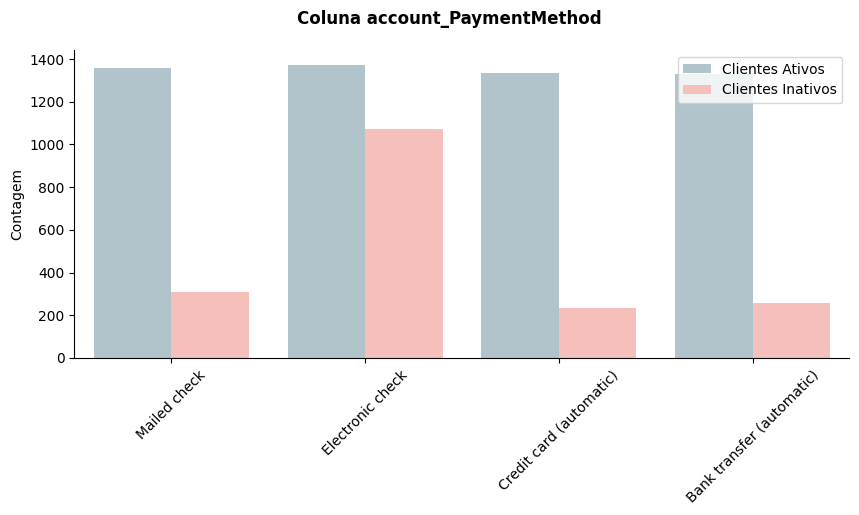

In [218]:
cores_pasteis = ['#AEC6CF', '#FFB7B2']

for col in colunas[2:]:

    fig, ax = plt.subplots(figsize=(10,4))

    sns.countplot(
        data=df,
        x=col,
        hue='Churn',
        palette=cores_pasteis
    )

    fig.suptitle(f'Coluna {col}', weight='bold')

    # Substitui legenda 0 e 1 por nomes claros
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, ['Clientes Ativos', 'Clientes Inativos'])

    plt.xlabel('')
    plt.ylabel('Contagem')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.xticks(rotation=45)
    plt.show()

In [219]:
# Seleciona as principais variáveis numéricas relacionadas ao comportamento do cliente
variaveis_numericas = [
    'customer_tenure',            # tempo de contrato (meses)
    'account_Charges_Monthly',    # valor pago mensalmente
    'account_Charges_Total'       # valor total gasto pelo cliente
]

In [220]:
# Agrupa os dados pelo status do cliente (0 = ativo, 1 = inativo)
# e calcula estatísticas descritivas das variáveis numéricas
df.groupby('Churn')[variaveis_numericas].describe()

customer_tenure                                                     \
                count       mean        std  min   25%   50%   75%   max   
Churn                                                                      
0              5398.0  37.321045  24.178367  0.0  14.0  37.0  61.0  72.0   
1              1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   

      account_Charges_Monthly                                             \
                        count       mean        std    min    25%    50%   
Churn                                                                      
0                      5398.0  61.354224  31.105006  18.25  25.10  64.50   
1                      1869.0  74.441332  24.666053  18.85  56.15  79.65   

                       account_Charges_Total                                   \
           75%     max                 count         mean          std    min   
Churn                                                                           
0      88.6375  118.75                5398.0  2535.263977  2330.802193   0.00   
1      94.2000  118.35                1869.0  1531.796094  1890.822994  18.85   

                                              
            25%       50%       75%      max  
Churn                                         
0      564.3625  1663.625  4237.275  8672.45  
1      134.5000   703.550  2331.300  8684.80

/tmp/ipython-input-210822684.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


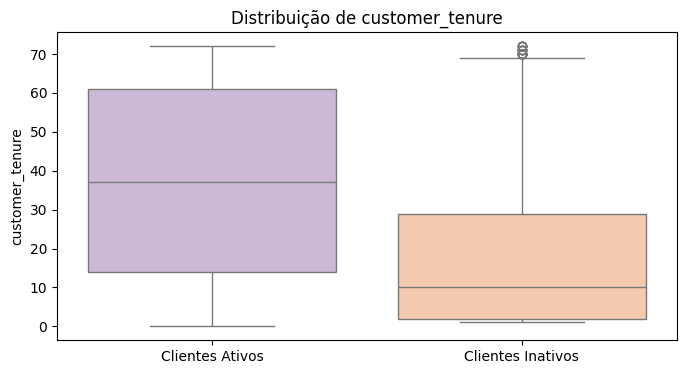

/tmp/ipython-input-210822684.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


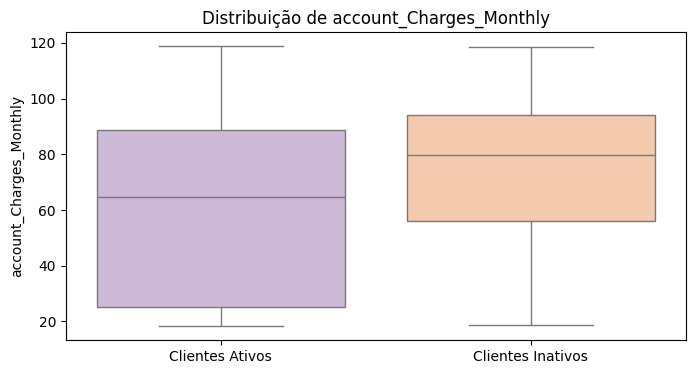

/tmp/ipython-input-210822684.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


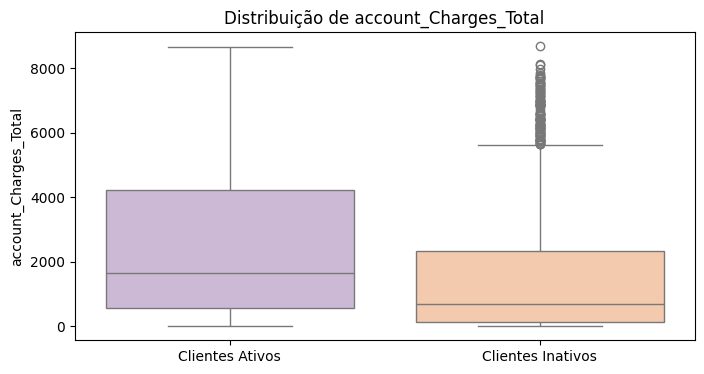

In [221]:
cores_pasteis = ['#CDB4DB', '#FFC8A2']

for col in variaveis_numericas:

    plt.figure(figsize=(8,4))

    sns.boxplot(
        data=df,
        x='Churn',
        y=col,
        palette=cores_pasteis
    )

    plt.xticks([0,1], ['Clientes Ativos', 'Clientes Inativos'])

    plt.title(f'Distribuição de {col}')
    plt.xlabel('')
    plt.ylabel(col)

    plt.show()

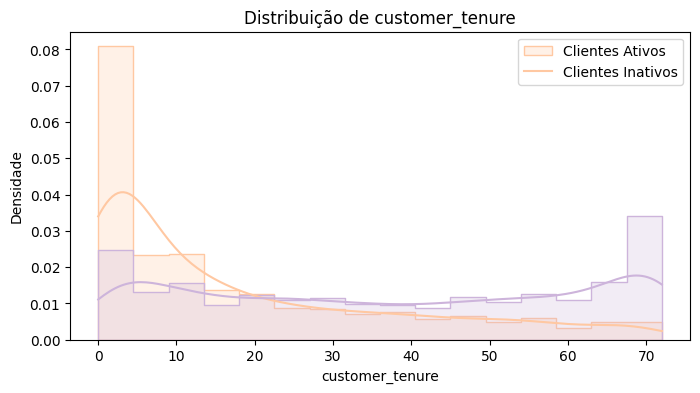

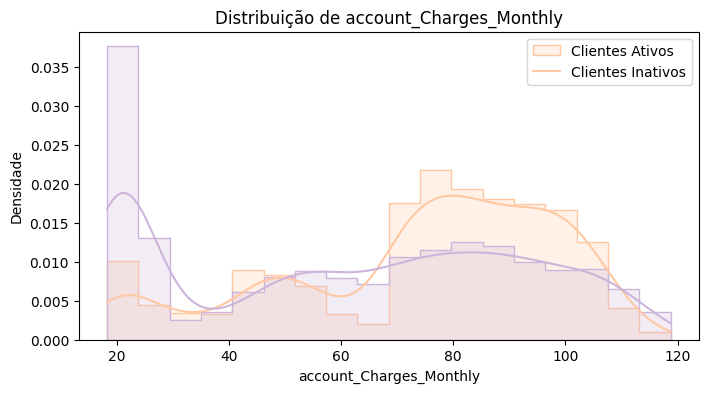

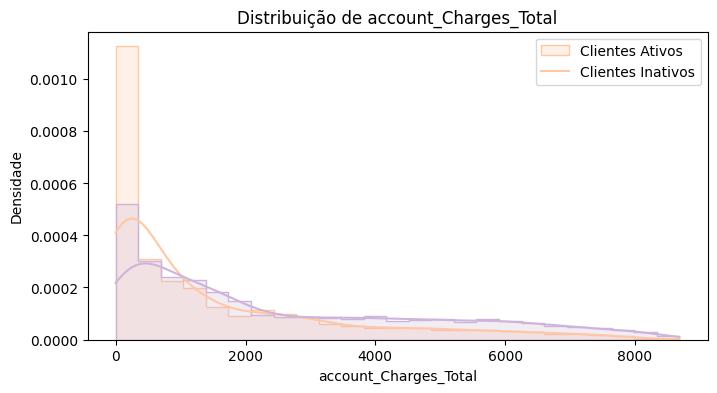

In [222]:
# Percorre cada variável numérica da lista
for col in variaveis_numericas:

    # Define o tamanho da figura do gráfico
    plt.figure(figsize=(8,4))

    # Cria o histograma para visualizar a distribuição dos dados
    sns.histplot(
        data=df,              # DataFrame utilizado na análise
        x=col,                # Variável numérica analisada no eixo X
        hue='Churn',          # Separa os dados por status do cliente (ativo/inativo)
        palette=cores_pasteis,# Define cores em tons pastéis
        kde=True,             # Adiciona curva de densidade para melhor visualização
        element='step',       # Mostra apenas o contorno das distribuições
        stat='density',       # Normaliza os valores para densidade (comparação proporcional)
        common_norm=False     # Evita normalização conjunta entre os grupos
    )

    # Define o título do gráfico dinamicamente para cada variável
    plt.title(f'Distribuição de {col}')

    # Nome do eixo X
    plt.xlabel(col)

    # Nome do eixo Y
    plt.ylabel('Densidade')

    # Ajusta a legenda para nomes mais claros
    plt.legend(['Clientes Ativos', 'Clientes Inativos'])

    # Exibe o gráfico
    plt.show()

## **Introdução**

O objetivo desta análise foi investigar os fatores relacionados à evasão de clientes da Telecom X. A evasão impacta diretamente os resultados da empresa, tornando importante compreender quais características estão associadas ao cancelamento dos serviços.

## **Limpeza e Tratamento de Dados**

Os dados foram importados por meio de uma API e convertidos para um DataFrame. Foram realizadas etapas de tratamento, incluindo:

Normalização das colunas;

Tratamento de valores ausentes;

Conversão de variáveis para formatos numéricos;

Padronização de valores categóricos (Yes/No para 1/0);

Criação da variável Contas_Diarias.

## **Análise Exploratória de Dados**

Foram analisadas variáveis categóricas e numéricas utilizando estatísticas descritivas e visualizações gráficas. A análise permitiu observar a distribuição dos clientes e identificar relações entre evasão, tipo de contrato, serviços contratados e tempo de permanência.

## **Conclusões e Insights**

Os resultados indicam que clientes com menor tempo de contrato apresentam maior tendência ao cancelamento. Além disso, características contratuais e o nível de utilização dos serviços influenciam o comportamento dos clientes.

##**Recomendações**

* Desenvolver ações de retenção para novos clientes;
* Incentivar contratos de maior duração;
* Monitorar perfis com maior probabilidade de evasão.

Os achados evidenciam que a evasão está diretamente relacionada a padrões específicos de perfil e utilização dos serviços. Com base nessas informações, torna-se possível implementar estratégias de retenção mais eficientes, reduzindo cancelamentos e fortalecendo o desempenho sustentável da empresa.

# Extra: : Análise de Correlação entre Variáveis

In [223]:
# Calcula a matriz de correlação apenas para variáveis numéricas
correlacao = df.corr(numeric_only=True)

# Visualiza as primeiras correlações
correlacao

,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,account_PaperlessBilling,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
Churn,1.000000,0.146733,-0.148546,-0.161384,-0.344079,0.012571,0.186666,0.189866,-0.193345,0.189918
customer_SeniorCitizen,0.146733,1.000000,0.022970,-0.212952,0.018187,0.010060,0.157734,0.220388,0.104076,0.220360
customer_Partner,-0.148546,0.022970,1.000000,0.448900,0.377551,0.018828,-0.011201,0.097122,0.315409,0.097180
customer_Dependents,-0.161384,-0.212952,0.448900,1.000000,0.159892,-0.003863,-0.111752,-0.115832,0.061474,-0.115879
customer_tenure,-0.344079,0.018187,0.377551,0.159892,1.000000,0.010205,0.007949,0.247982,0.825407,0.247992
phone_PhoneService,0.012571,0.010060,0.018828,-0.003863,0.010205,1.000000,0.013624,0.246709,0.113985,0.246668
account_PaperlessBilling,0.186666,0.157734,-0.011201,-0.111752,0.007949,0.013624,1.000000,0.353714,0.160023,0.353699
account_Charges_Monthly,0.189866,0.220388,0.097122,-0.115832,0.247982,0.246709,0.353714,1.000000,0.652211,0.999996
account_Charges_Total,-0.193345,0.104076,0.315409,0.061474,0.825407,0.113985,0.160023,0.652211,1.000000,0.652225
Contas_Diarias,0.189918,0.220360,0.097180,-0.115879,0.247992,0.246668,0.353699,0.999996,0.652225,1.000000


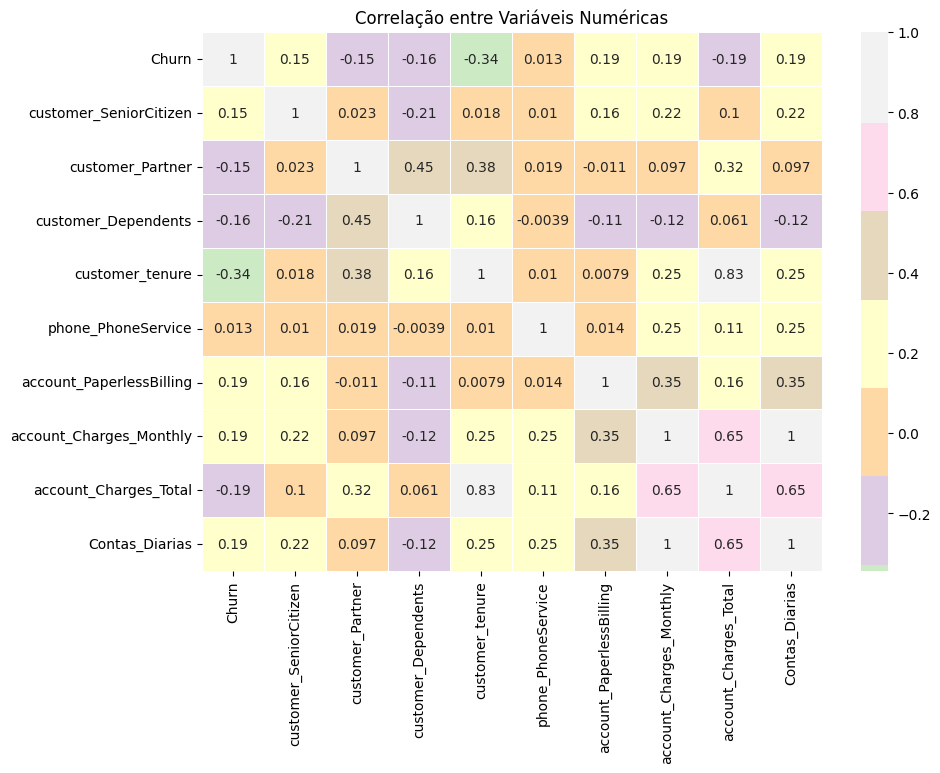

In [224]:
# Calcula matriz de correlação apenas das colunas numéricas
corr = df.corr(numeric_only=True)

# Cria o gráfico
plt.figure(figsize=(10,7))

sns.heatmap(
    corr,
    annot=True,                 # mostra valores
    cmap='Pastel1',             # paleta pastel
    center=0,
    linewidths=0.5,
    linecolor='white'
)

plt.title('Correlação entre Variáveis Numéricas')
plt.show()

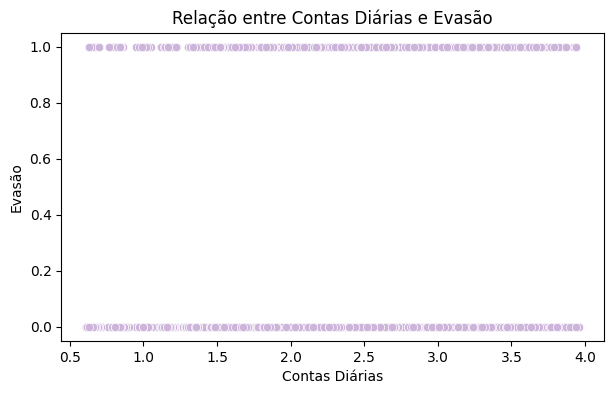

In [225]:
# Gráfico de dispersão entre contas diárias e evasão
plt.figure(figsize=(7,4))

sns.scatterplot(
    data=df,
    x='Contas_Diarias',
    y='Churn',
    color='#CDB4DB'
)

plt.title('Relação entre Contas Diárias e Evasão')
plt.xlabel('Contas Diárias')
plt.ylabel('Evasão')
plt.show()

In [227]:
df.columns

Index(['D', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total', 'Contas_Diarias'],
      dtype='object')

In [228]:
# Lista das colunas de serviços adicionais
servicos = [
    'internet_OnlineSecurity',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies'
]

# Soma os serviços por cliente (cada coluna deve estar como 0/1)
df['Total_Servicos'] = df[servicos].sum(axis=1)

In [229]:
df[['Total_Servicos'] + servicos].head()

,Total_Servicos,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies
0,3,0,1,0,1,1,0
1,1,0,0,0,0,0,1
2,1,0,0,1,0,0,0
3,4,0,1,1,0,1,1
4,2,0,0,0,1,1,0


/tmp/ipython-input-3396941015.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-3396941015.py:5: UserWarning: 
The palette list has fewer values (2) than needed (8) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


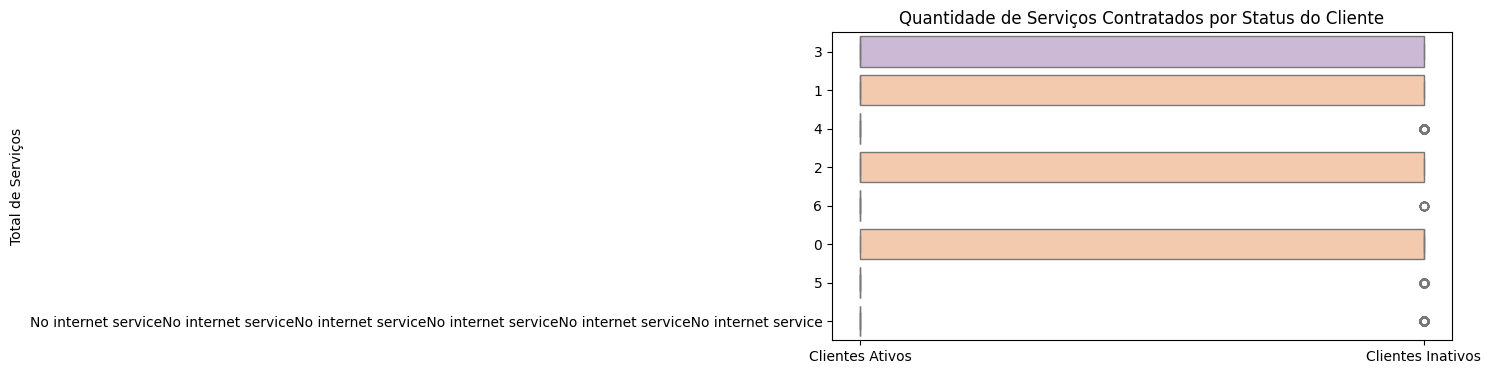

In [232]:
cores_suaves = ['#CDB4DB', '#FFC8A2']  # lilás pastel e pêssego pastel

plt.figure(figsize=(8,4))

sns.boxplot(
    data=df,
    x='Churn',
    y='Total_Servicos',
    palette=cores_suaves
)

plt.xticks([0,1], ['Clientes Ativos', 'Clientes Inativos'])
plt.title('Quantidade de Serviços Contratados por Status do Cliente')
plt.xlabel('')
plt.ylabel('Total de Serviços')

plt.show()